In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
from datetime import datetime as dtime

In [2]:
import matplotlib.dates as mdates

In [3]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.utf-8')

'en_US.utf-8'

### funções

In [4]:
def butter_low_pass_filter(Time_Serie, Filter_Order, Cutoff_Period):
    
    Length = len(Time_Serie)
    Cutoff_Frequency = 1/Cutoff_Period
    Data = np.array(Time_Serie)
   
    B, A = signal.butter(Filter_Order, Cutoff_Frequency, output='ba', analog=False)
    Filtered_Data = signal.filtfilt(B, A, Data)
    
    return Filtered_Data

In [5]:
%matplotlib inline

In [6]:
plt.style.use('default')

plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 10
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["legend.title_fontsize"] = 10
plt.rcParams["figure.figsize"] = (8, 5)

In [7]:
path = '/home/gus/Documentos/mestrado/dados-mestrado/vento-inmet/'

In [8]:
dfw = pd.read_csv(path + 'vento_rotacionado.csv', delimiter= ';')

In [9]:
dfw.head()

,wul,wvl,wgul,wgvl,time
0,-0.198395,1.615797,-0.532534,4.337140,2016-12-01 00:00:00
1,-0.481849,2.087116,-1.117889,4.842108,2016-12-01 01:00:00
2,-0.250604,2.041007,-0.647394,5.272602,2016-12-01 02:00:00
3,-0.427536,2.011399,-1.246980,5.866580,2016-12-01 03:00:00
4,-0.313462,2.982394,-0.671705,6.390843,2016-12-01 04:00:00


In [10]:
time = [dtime.strptime(ii,'%Y-%m-%d %H:%M:%S') for ii in dfw.time]

In [11]:
timenum = mdates.date2num(time)

In [12]:
Wul = dfw.wul.interpolate(method='linear', limit=12)
Wvl = dfw.wvl.interpolate(method='linear', limit=12)

In [13]:
WulFiltrado = butter_low_pass_filter(Wul, 2, 25);
WvlFiltrado = butter_low_pass_filter(Wvl, 2, 25);

In [14]:
#First, design the Buterworth filter
#N  = 2    # Filter order
#Wn = 0.04 # Cutoff frequency 1/25h
#B, A = signal.butter(N, Wn, output='ba')
 
# Second, apply the filter
#ulFiltered = signal.filtfilt(B, A, data)

In [15]:
dfw.head()

,wul,wvl,wgul,wgvl,time
0,-0.198395,1.615797,-0.532534,4.337140,2016-12-01 00:00:00
1,-0.481849,2.087116,-1.117889,4.842108,2016-12-01 01:00:00
2,-0.250604,2.041007,-0.647394,5.272602,2016-12-01 02:00:00
3,-0.427536,2.011399,-1.246980,5.866580,2016-12-01 03:00:00
4,-0.313462,2.982394,-0.671705,6.390843,2016-12-01 04:00:00


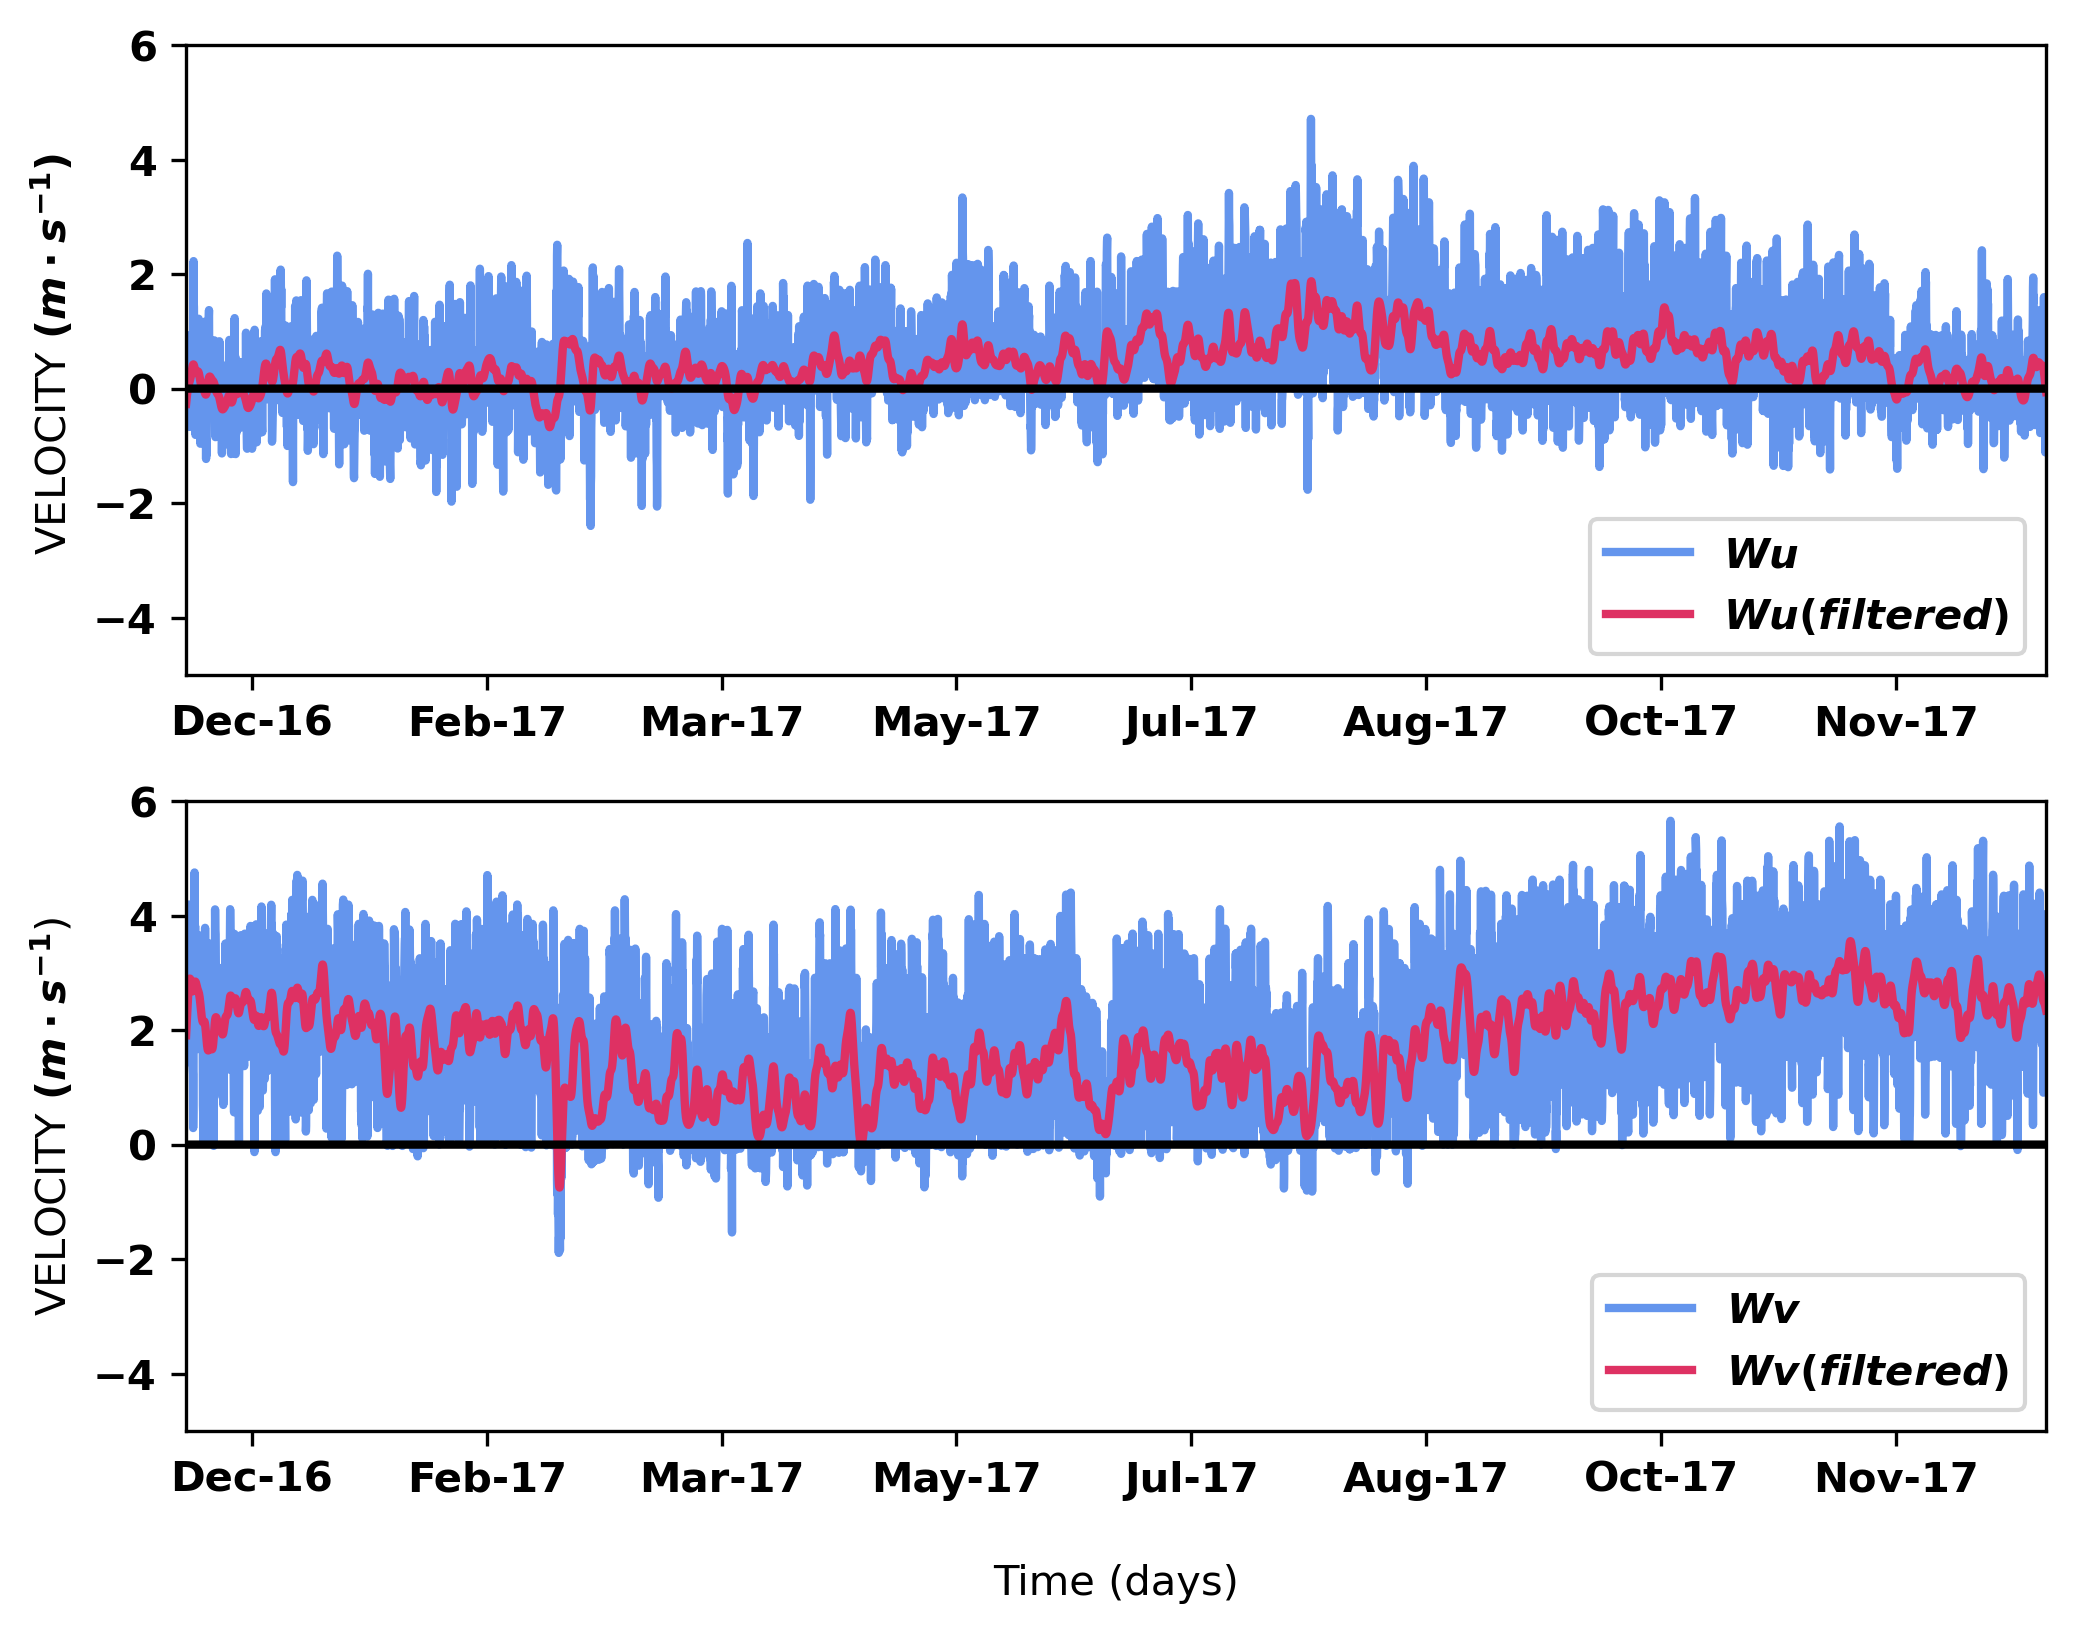

In [16]:
constante = np.zeros_like(timenum) # zero do gráfico

myfmt = mdates.DateFormatter("%b-%y")
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6),dpi=300,fmt='jpg')

ax1.plot(timenum, Wul,c='#6495ED',label=r'$Wu$')
ax1.plot(timenum, WulFiltrado,ls='-',c='#DE3163', label='$Wu(filtered)$')
ax1.plot(timenum,constante,'-',c='black')

ax2.plot(timenum, Wvl,c='#6495ED',label=r'$Wv$')
ax2.plot(timenum, WvlFiltrado,ls='-',c='#DE3163',label="$Wv(filtered)$")
ax2.plot(timenum,constante,'-',c='black')

ax1.set_ylabel(r' VELOCITY $(m \cdot s^{-1})$')
ax2.set_ylabel(r'VELOCITY $(m \cdot s^{-1}$)')

ax2.set_xlabel("\nTime (days)")

ax1.set_xlim([min(timenum), max(timenum)])
ax2.set_xlim([min(timenum), max(timenum)])

ax1.set_ylim([-5, 6])
ax2.set_ylim([-5, 6])

ax1.xaxis.set_major_formatter(myfmt)
ax2.xaxis.set_major_formatter(myfmt)

ax1.legend(loc='lower right')
ax2.legend(loc='lower right')
plt.show()

In [17]:
ventoFiltrado = pd.DataFrame({'ulFiltrado':WulFiltrado,'vlFiltrado':WvlFiltrado, 'time':dfw.time})

In [19]:
ventoFiltrado.to_csv(path+'vento_filtrado.csv', sep=';', index=False)